In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Dec_TF')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)

output_file_path = r"C:\Users\30393\Desktop\Dec_TF_scaler.xlsx"
df.to_excel(output_file_path, index=False)

      Column        Mean        Std
0       Year    2.031746   0.860077
1          R  105.865079  11.214553
2          G  126.494709   8.700178
3          B   41.941799  11.010063
4         NR    0.385434   0.024532
5         NG    0.461379   0.017396
6         NB    0.153187   0.039817
7         GB    3.262799   1.054993
8         RB    2.743929   0.940980
9         GR    1.199568   0.047431
10        BI   98.550054   7.159659
11       BIM   13.515767   0.437915
12       SCI   -0.090303   0.019830
13       GLI    0.262471   0.032638
14        HI    0.480970   0.165976
15     NGRDI    0.090303   0.019830
16     NDGBI    0.505661   0.109835
17     NDRBI    0.435004   0.130067
18         I  274.301587  17.605887
19         S    0.540439   0.119451
20      VARI    0.112274   0.029832
21       HUE   -1.566765   0.000842
22      HUE2   -1.567782   0.000239
23       BGI    0.335554   0.099332
24         L   91.433862   5.868629
25      GRAY  110.687418   7.919085
26      GLAI    4.056856   0

In [4]:
df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year','Number', 'TF(mg/g)'], axis=1)
y = df['TF(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)  


feature_importance_df = pd.DataFrame({                
'Feature': X.columns,                
'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

Feature Importance: [0.18915568 0.04459346 0.00789828 0.00584964 0.00630052 0.00649144
 0.00346005 0.00135697 0.0018367  0.0084429  0.00378602 0.00242198
 0.00733708 0.00905642 0.00177599 0.00280896 0.00256542 0.0071859
 0.00395686 0.02359111 0.01066401 0.01005738 0.00607628 0.00636567
 0.0100154  0.03174187 0.00261306 0.00711191 0.01925897 0.08150953
 0.00625576 0.28917524 0.00302073 0.099082   0.01581497 0.01927866
 0.01470696 0.00698468 0.02039557]
   Feature  Importance
31  RplusG    0.289175
0        R    0.189156
33   GminB    0.099082
29   RminB    0.081510
1        G    0.044593
25    GLAI    0.031742
19    VARI    0.023591
38      C*    0.020396
35      L*    0.019279
28      RI    0.019259
34  BplusG    0.015815
36      a*    0.014707
20     HUE    0.010664
21    HUE2    0.010057
24    GRAY    0.010015
13      HI    0.009056


In [6]:

output_file = 'top_sixteen_features_Dec_TF.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Dec_TF.xlsx


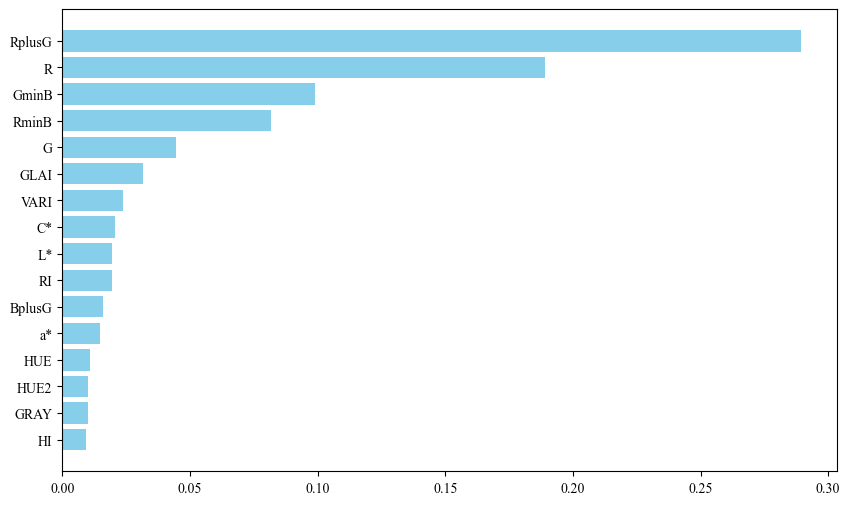

In [7]:
import os
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.savefig('Dec_TF_a.jpg', dpi=600, bbox_inches='tight')
plt.show()

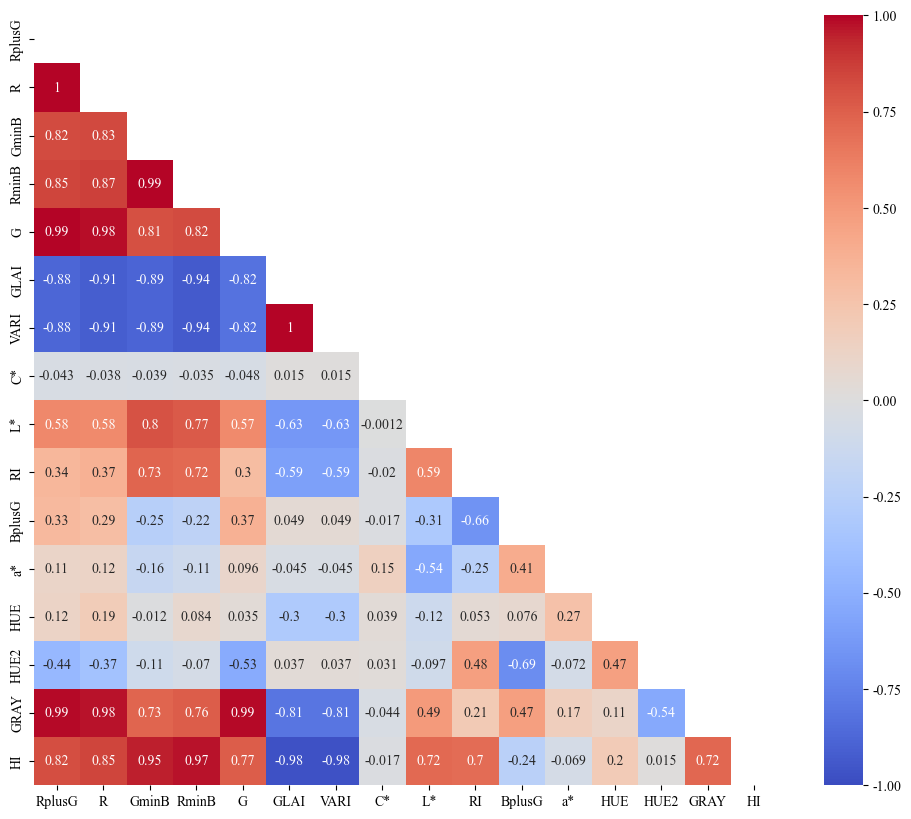

In [11]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Dec_TF_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [13]:
import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    features_to_remove = set()

    for pair in high_corr_pairs:
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features

sorted_features = list(top_sixteen_features_df['Feature'][:16])

final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print("Final Retained Features：", final_features)

Final Retained Features： ['RplusG', 'GminB', 'GLAI', 'C*', 'L*', 'RI', 'BplusG', 'a*', 'HUE', 'HUE2']


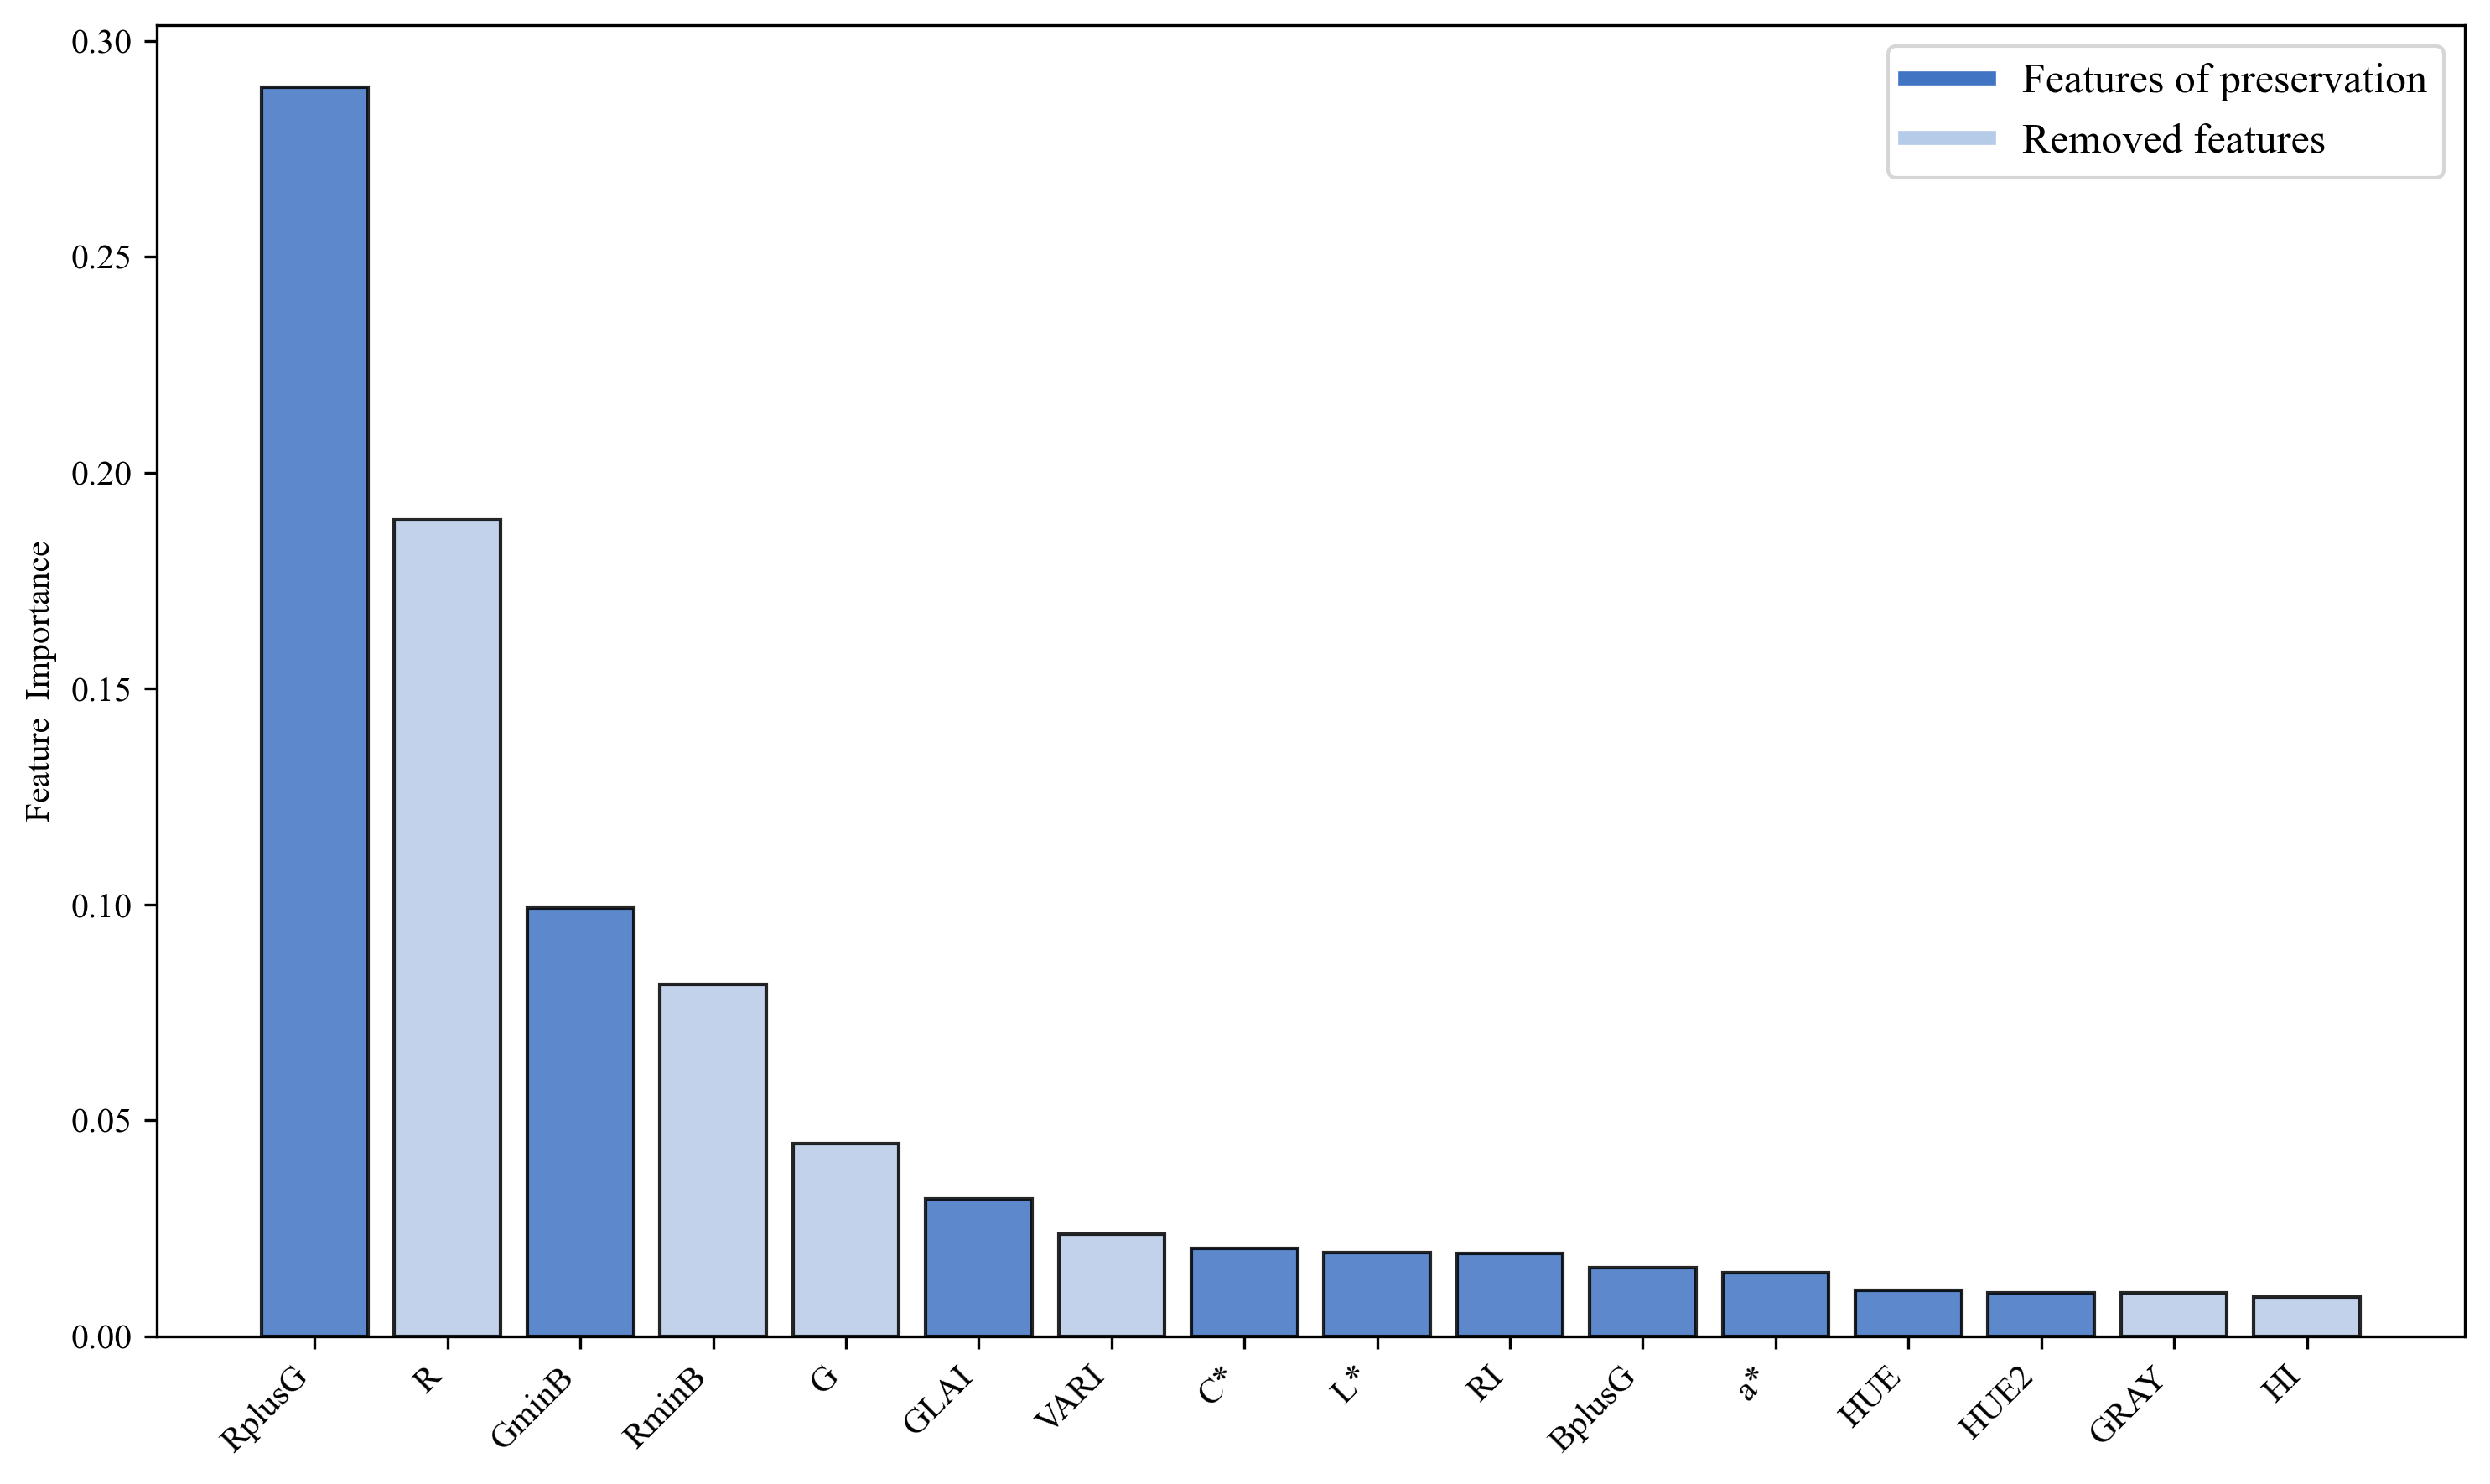

In [14]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()  
feature_importances = feature_importance_df.iloc[0:16]['Importance']  
selected_features = final_features  


colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]


plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)


red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature  Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Dec_TF_c.jpg', dpi=600)
plt.show()

In [ ]:
#RF




In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    rf_model = RandomForestRegressor(random_state=42)
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                       Features  Num_Features  CV Mean R^2
0               [GLAI, RI, HUE]             3     0.721542
1           [GLAI, L*, RI, HUE]             4     0.719809
2           [GLAI, C*, RI, HUE]             4     0.719025
3     [GLAI, C*, RI, HUE, HUE2]             5     0.718422
4       [GLAI, C*, L*, RI, HUE]             5     0.718241
...                         ...           ...          ...
1018                 [a*, HUE2]             2    -0.310054
1019                       [C*]             1    -0.367009
1020                      [HUE]             1    -0.374027
1021                       [a*]             1    -0.507062
1022                     [HUE2]             1    -0.515734

[1023 rows x 3 columns]


best_combination is: ['GLAI', 'RI', 'HUE']


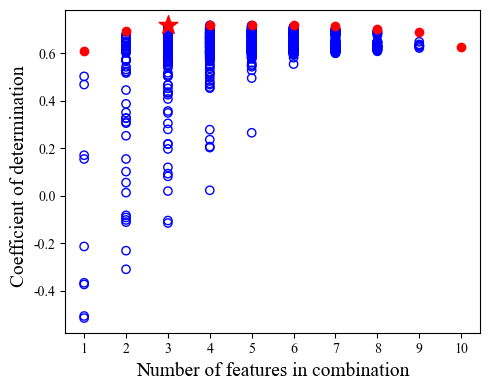

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TF_d.jpg', dpi=600)
plt.show()

In [ ]:
#svr





In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    svr_model = SVR(kernel='rbf')
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                     Features  Num_Features  CV Mean R^2
0       [GminB, GLAI, L*, RI]             4     0.739044
1           [GminB, GLAI, RI]             3     0.738106
2             [GminB, BplusG]             2     0.736986
3     [GminB, L*, RI, BplusG]             4     0.734595
4         [GminB, RI, BplusG]             3     0.734373
...                       ...           ...          ...
1018                 [C*, a*]             2    -0.016223
1019               [a*, HUE2]             2    -0.028713
1020              [HUE, HUE2]             2    -0.031176
1021                     [a*]             1    -0.091392
1022                   [HUE2]             1    -0.109167

[1023 rows x 3 columns]


best_combination is: ['GminB', 'GLAI', 'L*', 'RI']


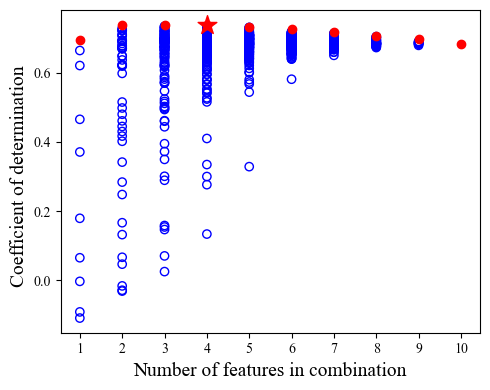

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TF_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp




In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    )
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                               Features  Num_Features  CV Mean R^2
0             [GminB, GLAI, RI, BplusG]             4     0.722831
1                         [GminB, GLAI]             2     0.718013
2                [GminB, GLAI, RI, HUE]             4     0.717511
3     [RplusG, GminB, GLAI, C*, L*, RI]             6     0.717424
4                 [RplusG, GminB, HUE2]             3     0.716869
...                                 ...           ...          ...
1018        [C*, BplusG, a*, HUE, HUE2]             5    -0.180936
1019                        [HUE, HUE2]             2    -0.190651
1020                           [C*, a*]             2    -0.211948
1021                               [C*]             1    -0.362926
1022                         [C*, HUE2]             2    -0.513638

[1023 rows x 3 columns]


best_combination is: ['GminB', 'GLAI', 'RI', 'BplusG']


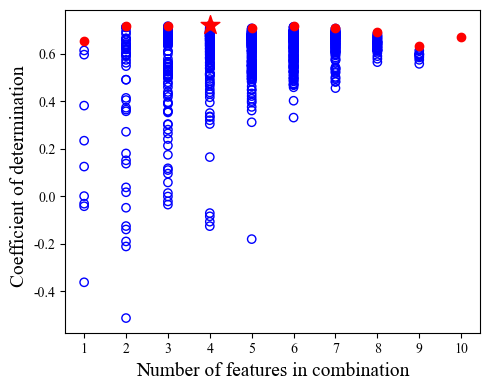

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TF_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb





In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                         Features  Num_Features  CV Mean R^2
0                 [GLAI, RI, HUE]             3     0.726759
1             [GLAI, L*, a*, HUE]             4     0.708029
2     [GLAI, C*, L*, RI, a*, HUE]             6     0.707321
3             [GLAI, L*, RI, HUE]             4     0.702704
4         [GLAI, L*, RI, a*, HUE]             5     0.701954
...                           ...           ...          ...
1018                   [a*, HUE2]             2    -0.660511
1019                         [C*]             1    -0.816667
1020                         [a*]             1    -0.830866
1021                        [HUE]             1    -0.941141
1022                       [HUE2]             1    -1.000163

[1023 rows x 3 columns]


best_combination is: ['GLAI', 'RI', 'HUE']


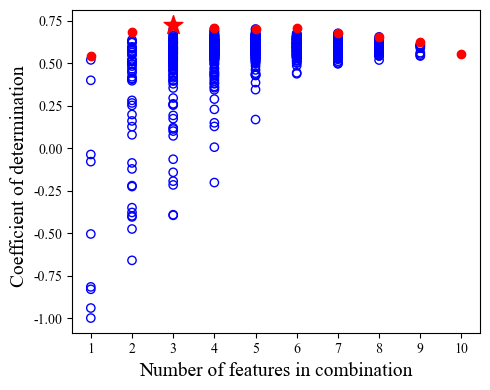

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TF_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb




In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                                 Features  Num_Features  CV Mean R^2
0           [GminB, GLAI, C*, L*, RI, a*]             6     0.740024
1               [GminB, GLAI, L*, RI, a*]             5     0.738483
2     [GminB, GLAI, C*, L*, RI, a*, HUE2]             7     0.735364
3       [GminB, GLAI, C*, L*, RI, BplusG]             6     0.734494
4         [GminB, GLAI, L*, RI, a*, HUE2]             6     0.734047
...                                   ...           ...          ...
1018                                [HUE]             1    -0.043026
1019                                 [a*]             1    -0.055286
1020                      [a*, HUE, HUE2]             3    -0.063727
1021                       [C*, a*, HUE2]             3    -0.069761
1022                           [a*, HUE2]             2    -0.087874

[1023 rows x 3 columns]


best_combination is: ['GminB', 'GLAI', 'C*', 'L*', 'RI', 'a*']


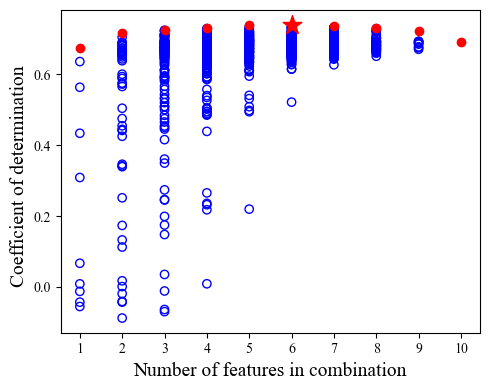

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TF_h.jpg', dpi=600)
plt.show()

In [25]:
#RF
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

selected_features = ['GLAI', 'RI', 'HUE']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.6238 0.8584 0.7061 0.8097 0.6097], mean R² ± SD：0.7215 ± 0.0988
MAE ：[0.4209 0.3269 0.39   0.4086 0.4478], mean MAE ± SD：0.3988 ± 0.0406
RMSE ：[0.5197 0.3906 0.5281 0.5111 0.6376], mean RMSE ± SD：0.5174 ± 0.0783


In [26]:
#svr
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

selected_features = ['GminB', 'GLAI', 'L*', 'RI']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.6759 0.8612 0.7629 0.7836 0.6115], mean R² ± SD：0.739 ± 0.0869
MAE ：[0.3832 0.3044 0.3666 0.4035 0.4424], mean MAE ± SD：0.38 ± 0.0455
RMSE ：[0.4823 0.3867 0.4742 0.5451 0.6361], mean RMSE ± SD：0.5049 ± 0.0828


In [27]:
#mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

selected_features = ['GminB', 'GLAI', 'RI', 'BplusG']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.6187 0.8565 0.7429 0.7854 0.6107], mean R² ± SD：0.7228 ± 0.0955
MAE ：[0.4261 0.309  0.3802 0.3696 0.4515], mean MAE ± SD：0.3873 ± 0.0492
RMSE ：[0.5232 0.3932 0.4939 0.5427 0.6369], mean RMSE ± SD：0.518 ± 0.0786


In [28]:
#xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

selected_features = ['GLAI', 'RI', 'HUE']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.6729 0.7698 0.6986 0.7854 0.7071], mean R² ± SD：0.7268 ± 0.0433
MAE ：[0.3573 0.3816 0.3872 0.4296 0.405 ], mean MAE ± SD：0.3921 ± 0.0242
RMSE ：[0.4845 0.498  0.5348 0.5428 0.5524], mean RMSE ± SD：0.5225 ± 0.0265


In [30]:
#lgb
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

selected_features = ['GminB', 'GLAI', 'C*', 'L*', 'RI', 'a*']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.666  0.8313 0.783  0.8179 0.6019], mean R² ± SD：0.74 ± 0.0903
MAE ：[0.4162 0.3101 0.3485 0.3913 0.4766], mean MAE ± SD：0.3885 ± 0.0571
RMSE ：[0.4896 0.4263 0.4537 0.5    0.644 ], mean RMSE ± SD：0.5027 ± 0.0754


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [31]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV  
from skopt.space import Real, Categorical  


X = df[['GminB', 'GLAI', 'L*', 'RI']]
y = df['TF(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svr = SVR()


search_space = {
     'C': Real(40, 50, prior='log-uniform'),       
    'kernel': Categorical(['rbf']),                 
    'epsilon': Real(0.01, 0.03, prior='uniform'),    
    'shrinking': Categorical([False]),              
}


bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=50,
    cv=5,           
    scoring='r2',  
    random_state=42,
    n_jobs=-1
)



bayes_search.fit(X_train, y_train)


best_params = bayes_search.best_params_
print(best_params)


best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)


test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)


train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)


print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 40.0, 'epsilon': 0.03, 'kernel': 'rbf', 'shrinking': False})
test R2 : 0.7453
test RMSE : 0.4633
test MAE : 0.3749
train R2 : 0.8181
train RMSE : 0.4346
train MAE : 0.2624


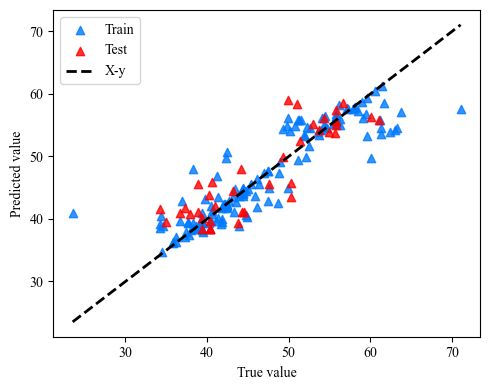

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

mean_value = 46.998152
std_value = 8.232192  


y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value


y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))


plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')


min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')



plt.xlabel('True value')
plt.ylabel('Predicted value')

plt.legend()


plt.tight_layout()
plt.savefig('Dec_TF_i.jpg', dpi=600)
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TF_scaler.xlsx")

model_features = {
    'RF': ['GLAI', 'RI', 'HUE'],
    'SVR': ['GminB', 'GLAI', 'L*', 'RI'],
    'MLP': ['GminB', 'GLAI', 'RI', 'BplusG'],
    'XGBoost': ['GLAI', 'RI', 'HUE'],
    'LightGBM': ['GminB', 'GLAI', 'C*', 'L*', 'RI', 'a*'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(
            n_estimators=40,
            max_depth=5,
            random_state=42
        ),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(
            kernel='linear',
            C=10,
        ),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(
            hidden_layer_sizes=(10, 5),
            activation='logistic',
            alpha=0.1,
            max_iter=100,
            random_state=42
        ),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(
            n_estimators=50,
            max_depth=3,
            learning_rate=0.1,
            random_state=42
        ),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(
            n_estimators=50,
            max_depth=3,
            learning_rate=0.1,
            verbose=-1,
            random_state=42
        ),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    
    features = model_features[name]
    
    X_train_subset = X_train[features]
    
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(0.01, 10, prior='log-uniform'),
    'fit_intercept': Categorical([True]),
}

bayes_search = BayesSearchCV(
    meta_model, 
    param_bayes, 
    n_iter=10, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    
    model.fit(X_train[features].values, y_train.values.ravel())
    
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['GLAI', 'RI', 'HUE'])...

train SVR model (feature: ['GminB', 'GLAI', 'L*', 'RI'])...

train MLP model (feature: ['GminB', 'GLAI', 'RI', 'BplusG'])...

train XGBoost model (feature: ['GLAI', 'RI', 'HUE'])...

train LightGBM model (feature: ['GminB', 'GLAI', 'C*', 'L*', 'RI', 'a*'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.010253943538922507, 'fit_intercept': True})
model-R2: 0.7286

test:
R2: 0.7551
RMSE: 0.4543
MAE: 0.3300

train:
R2: 0.7577
RMSE: 0.5017
MAE: 0.3638


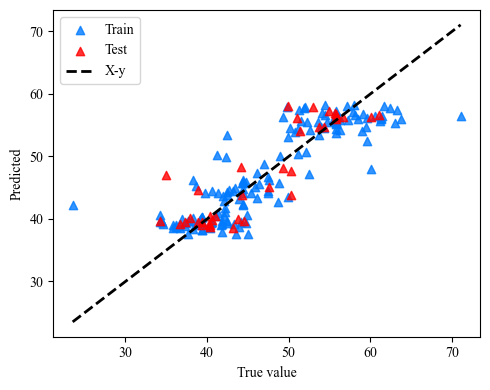

In [34]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox


mean_value = 46.998152
std_value = 8.232192  



y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value


y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))


plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')



min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')


plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Dec_TF_j.jpg', dpi=300)
plt.show()

RF: 0.3369
SVR: 0.2671
MLP: 0.0000
XGBoost: 0.0000
LightGBM: 0.2467


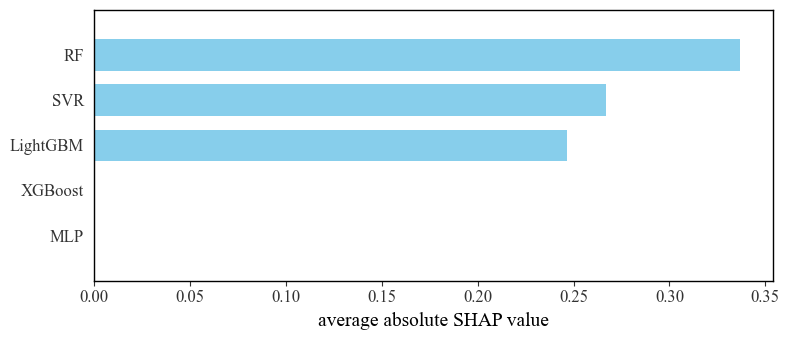

In [35]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)


for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.4f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Dec_TF_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

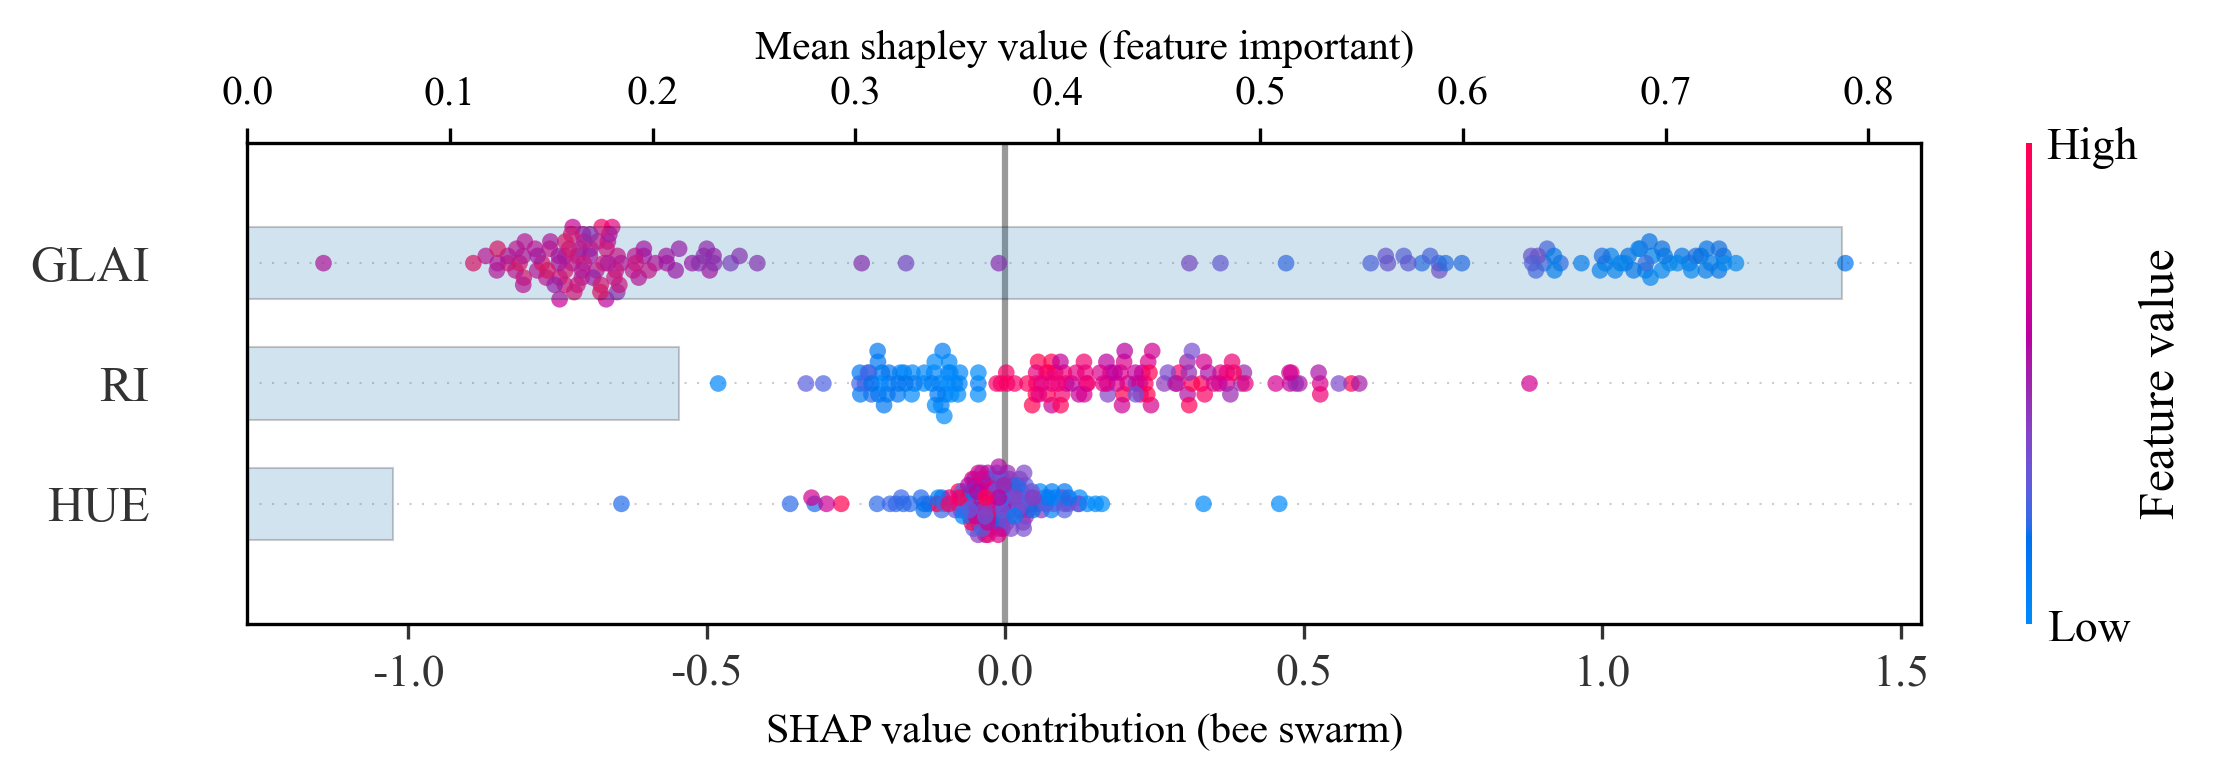

In [36]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_model = optimized_models['RF']['model']
rf_features = model_features['RF']

X_train_rf = X_train[rf_features]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_rf)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [rf_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_rf[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Dec_TF_l.png', bbox_inches='tight')  
plt.show()  

In [37]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(rf_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
GLAI: 0.7870
RI: 0.2132
HUE: 0.0721
